<div style="text-align:center;">
    <h1 style="font-family:Arial, sans-serif; font-weight:bold; color:#FF5733">Yoga Pose Classification</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform
import os

## loading data

In [2]:

labels=list()
path='DATASET\\TRAIN\\'
os.listdir(path)
for i in os.listdir(path):
    labels.append(i)
print(labels)    

['downdog', 'goddess', 'plank', 'tree', 'warrior2']


In [3]:
Total_sample=0
for i in os.listdir(path):
    print(f'number of images in :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total number of images:{Total_sample}')

number of images in :downdog= 223
number of images in :goddess= 178
number of images in :plank= 264
number of images in :tree= 159
number of images in :warrior2= 250
Total number of images:1074


In [4]:
!pip install tqdm
from tqdm import tqdm

In [5]:
img_size=224     # 224x224
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(path+img)):
        if i<300:
            img_file=imread(path+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i=i+1
    i=0

100%|██████████| 250/250 [00:51<00:00,  4.88it/s]


In [6]:
X_train=np.asarray(X)
Y_train=np.asarray(Y)

In [7]:
X_train[0]


array([[[0.95323651, 0.93755023, 0.9414718 ],
        [0.95640688, 0.94072061, 0.94464218],
        [0.95686263, 0.94117635, 0.94509792],
        ...,
        [0.97700555, 0.96916241, 0.97308398],
        [0.97656109, 0.96871795, 0.97263952],
        [0.97892763, 0.97108449, 0.97500606]],

       [[0.95323651, 0.93755023, 0.9414718 ],
        [0.95640688, 0.94072061, 0.94464218],
        [0.95686263, 0.94117635, 0.94509792],
        ...,
        [0.97700555, 0.96916241, 0.97308398],
        [0.97647189, 0.96862875, 0.97255032],
        [0.97649263, 0.9686495 , 0.97257107]],

       [[0.9532589 , 0.93757262, 0.94149419],
        [0.95638283, 0.94069656, 0.94461813],
        [0.95686235, 0.94117608, 0.94509764],
        ...,
        [0.97700554, 0.96916241, 0.97308398],
        [0.97639849, 0.96855535, 0.97247692],
        [0.97448918, 0.96664604, 0.97056761]],

       ...,

       [[0.94508344, 0.90588173, 0.9098033 ],
        [0.94525572, 0.90605401, 0.90997558],
        [0.94781853, 0

## Visualisations

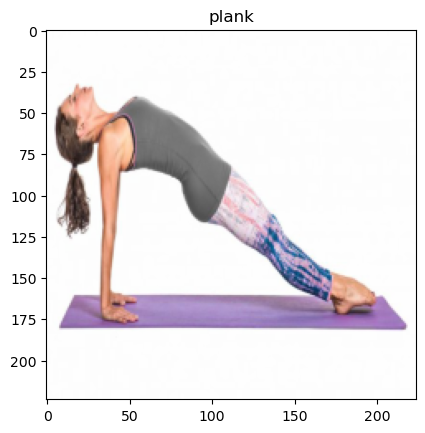

In [8]:
plt.imshow(X[402])
plt.title(labels[Y[402]])
plt.show()

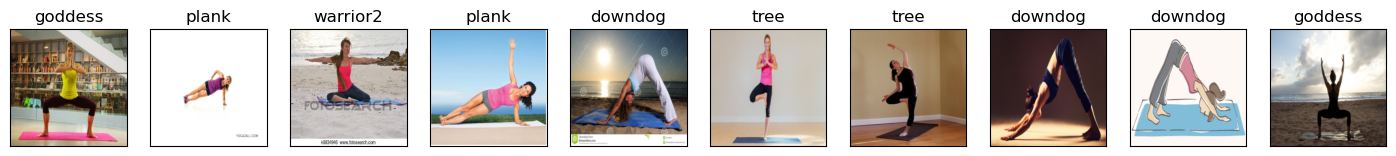

In [9]:
from random import randint
n = 50  
plt.figure(figsize=(90,40))
for i in range(10,20):
    rn=randint(0,987)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

## loading test data

In [10]:
test_labels=list()
Tpath='DATASET\\TEST\\'
os.listdir(Tpath)
for i in os.listdir(Tpath):
    test_labels.append(i)
print(test_labels)    

['downdog', 'goddess', 'plank', 'tree', 'warrior2']


In [11]:
Total_sample=0
for i in os.listdir(Tpath):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(Tpath,i)))}')
    Total_sample+=len(os.listdir(os.path.join(Tpath,i)))
print(f'Total Samples:{Total_sample}')

Length of :downdog= 97
Length of :goddess= 77
Length of :plank= 114
Length of :tree= 69
Length of :warrior2= 109
Total Samples:466


In [12]:
img_size=224     # 224x224
X_test=[] 
Y_test=[]
i=0
for idx,img in enumerate(os.listdir(Tpath)):
    for img_name in tqdm(os.listdir(Tpath+img)):
        if i<300:
            img_file=imread(Tpath+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X_test.append(img_file)
                Y_test.append(idx)
        else:
            break
        i=i+1
    i=0

 63%|██████▎   | 72/114 [00:34<00:04,  9.47it/s]C:\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 109/109 [00:25<00:00,  4.33it/s]


In [13]:
X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)

## Building CNN Model

We'll split our training data into train data and validation  data and use the testing data to evaluate our model later. 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, stratify=Y_train,random_state=42)



In [15]:
# OneHot-Encoding
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=len(labels))
Y_val=to_categorical(Y_val,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

In [16]:
print('Shapes of Data Split into Train & Validation & Test Part')
print(f'Training Data->{X_train.shape},{Y_train.shape} Testing Data->{X_test.shape,Y_test.shape} Validation Data->{X_val.shape,Y_val.shape}')

Shapes of Data Split into Train & Validation & Test Part
Training Data->(805, 224, 224, 3),(805, 5) Testing Data->((466, 224, 224, 3), (466, 5)) Validation Data->((269, 224, 224, 3), (269, 5))


In [17]:
Y_train.shape,Y_val.shape,Y_test.shape

((805, 5), (269, 5), (466, 5))

## Grid Search to find the best Hyper Parameters

Imports and defining Hyperparamater space

In [18]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

param_grid = {
    'batch_size': [32],
    'epochs': [15],
    'optimizer': [Adam, RMSprop,SGD],
    'learning_rate': [0.01, 0.001, 0.0001],
    
}





because the grid search take a huge amount of time when we set the hyperparamater space greater than this one above
we tried making it a lower space that's why we set the batch_size and epochs statics.

preparing the create model function to be used in the kerasclassifier

In [19]:
def create_model(optimizer='adam', learning_rate=0.001, dropout=0.2):
    model = Sequential([
        Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (4, 4), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(50, (3, 3), padding='same', activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout),
        Dense(len(labels), activation='softmax')
    ])
    opt = optimizer(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

creating instance of Kerasclassifier and gridsearchCV

In [20]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


model = KerasClassifier(build_fn=create_model)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=None)


C:\Users\MSI GF63\AppData\Local\Temp\ipykernel_24696\3348741929.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Finding the Grid results :

In [ ]:
grid_result = grid.fit(X_train, Y_train, validation_data=(X_val, Y_val), verbose=2)


Epoch 1/15
21/21 - 42s - loss: 40.7935 - accuracy: 0.2391 - val_loss: 1.5993 - val_accuracy: 0.2454 - 42s/epoch - 2s/step
Epoch 2/15
21/21 - 41s - loss: 1.6021 - accuracy: 0.2422 - val_loss: 1.5952 - val_accuracy: 0.2454 - 41s/epoch - 2s/step
Epoch 3/15
21/21 - 41s - loss: 1.5965 - accuracy: 0.2422 - val_loss: 1.5920 - val_accuracy: 0.2454 - 41s/epoch - 2s/step
Epoch 4/15
21/21 - 41s - loss: 1.5953 - accuracy: 0.2422 - val_loss: 1.5915 - val_accuracy: 0.2454 - 41s/epoch - 2s/step
Epoch 5/15
21/21 - 41s - loss: 1.5941 - accuracy: 0.2422 - val_loss: 1.5913 - val_accuracy: 0.2454 - 41s/epoch - 2s/step
Epoch 6/15
21/21 - 41s - loss: 1.5933 - accuracy: 0.2376 - val_loss: 1.5916 - val_accuracy: 0.2454 - 41s/epoch - 2s/step
Epoch 7/15
21/21 - 42s - loss: 1.5930 - accuracy: 0.2500 - val_loss: 1.5917 - val_accuracy: 0.2454 - 42s/epoch - 2s/step
Epoch 8/15
21/21 - 41s - loss: 1.5948 - accuracy: 0.2453 - val_loss: 1.5923 - val_accuracy: 0.2454 - 41s/epoch - 2s/step
Epoch 9/15
21/21 - 41s - loss: 

Finding the best parameters : 

In [110]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


NameError: name 'grid_result' is not defined

In [66]:
# CNN Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

model = Sequential([
    Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (4, 4), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(50, (3, 3), padding='same', activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(labels), activation='softmax') # Multi-class Classification Problem
])
model.compile(loss='categorical_crossentropy',optimizer='adam'
             ,metrics=['accuracy'])

In [67]:
epoch=3
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epoch, batch_size=32, verbose=2)


Epoch 1/3
26/26 - 41s - loss: 1.6231 - accuracy: 0.2435 - val_loss: 1.6282 - val_accuracy: 0.2082 - 41s/epoch - 2s/step
Epoch 2/3
26/26 - 54s - loss: 1.5568 - accuracy: 0.2919 - val_loss: 1.4388 - val_accuracy: 0.3755 - 54s/epoch - 2s/step
Epoch 3/3
26/26 - 54s - loss: 1.2588 - accuracy: 0.4981 - val_loss: 1.2972 - val_accuracy: 0.5316 - 54s/epoch - 2s/step


In [20]:
model.save('CNN_yoga.h5')

In [21]:
score=model.evaluate(X_test,Y_test,verbose=1)

15/15 [==============================] - 4s 294ms/step - loss: 1.7144 - accuracy: 0.7296


# Confusion Matrix

15/15 [==============================] - 4s 290ms/step


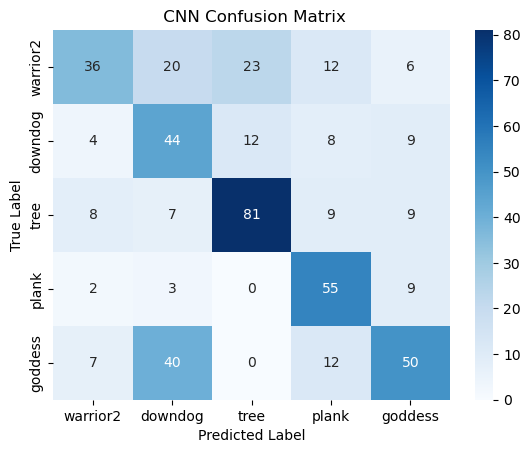

In [31]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
Y_t=np.argmax(Y_test,axis=1)
import seaborn as sns
from sklearn import metrics
cm=metrics.confusion_matrix(Y_t,y_pred)
class_names = ['warrior2', 'downdog', 'tree', 'plank', 'goddess']
# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(' CNN Confusion Matrix')
plt.show()